In [1]:
from tooling.loading import import_dataset
from data import FORUM, PROLIFIC, DATASETS

NAME = "DEFAULT"

import_dataset(name=NAME, ds_spec=FORUM)

Importing dataset: anno from /workspaces/uvl-tore-classifier-bert/src/data/datasets/forum/anno_test.json
Importing dataset: anno from /workspaces/uvl-tore-classifier-bert/src/data/datasets/forum/anno_train.json


In [2]:
from tooling.loading import load_dataset
from tooling.sampling import split_dataset

d = load_dataset(name=NAME)

split_dataset(name=NAME, text=d["text"], labels=d["self"], test_size=0.2, stratify=d["source"], random_state=125
)

In [5]:
from tooling.sampling import load_split_dataset, LABELS_TRAIN
from classifiers.sner import (
    create_train_file,
    create_config_file,
    train_sner,
)

labels_train = load_split_dataset(name=NAME, filename=LABELS_TRAIN)

create_config_file(name=NAME)
create_train_file(name=NAME, sentences=labels_train)

train_sner(name=NAME)

Invoked on Thu Jun 22 07:12:04 UTC 2023 with arguments: -prop /workspaces/uvl-tore-classifier-bert/src/data/temp/sner/DEFAULT/sner_config_file.prop
useTypeSeqs2=true
noMidNGrams=true
useWordPairs=true
trainFile=/workspaces/uvl-tore-classifier-bert/src/data/temp/sner/DEFAULT/sner_train_file.txt
maxLeft=1
serializeTo=/workspaces/uvl-tore-classifier-bert/src/data/temp/sner/DEFAULT/sner.ser.gz
wordShape=chris2useLC
useWordTag=true
useDisjunctive=true
useOccurrencePatterns=true
useClassFeature=true
useNGrams=true
useNext=true
usePrev=true
useGazettes=true
useTypeySequences=true
useSymTags=True
usePrevSequences=true
useTypeSeqs=true
useSequences=true
map=word=0,answer=1
useWord=true
useShapeConjunctions=True
numFeatures = 79959
Time to convert docs to feature indices: 1.6 seconds
Current memory used: 38m
numClasses: 13 [0=O,1=0,2=Interaction,3=Interaction_Data,4=Software,5=Activity,6=Domain_Data,7=Workspace,8=Internal_Action,9=Internal_Data,10=Stakeholder,11=System_Function,12=Task]
numDocum

In [4]:
from classifiers.sner import classify_sentences
from tooling.sampling import load_split_dataset, TEXT_TEST

text_test = load_split_dataset(name=NAME, filename=TEXT_TEST)
classify_sentences(name=NAME, sentences=text_test)

LookupError: 

===========================================================================
NLTK was unable to find the /workspaces/uvl-tore-classifier-bert/src/data/temp/sner/DEFAULT/sner.ser.gz file!
Use software specific configuration parameters or set the STANFORD_MODELS environment variable.
===========================================================================

In [ ]:
from classifiers.sner import (
    sentences_to_token_df,
    load_classification_result,
)
from tooling.sampling import load_split_dataset, LABELS_TEST

results = load_classification_result(name=NAME)

labels_test = load_split_dataset(name=NAME, filename=LABELS_TEST)
solution = sentences_to_token_df(labels_test)

In [ ]:
from tooling.model import TORE_LABELS
from sklearn.metrics import precision_score

p = precision_score(
    solution["label"], results["label"], average="macro", labels=TORE_LABELS
)

p

/Users/bockstaller/code/uvl-tore-classifier-bert/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.40331348397466854

In [ ]:
from sklearn.metrics import recall_score

r = recall_score(
    solution["label"], results["label"], average="macro", labels=TORE_LABELS
)

r

/Users/bockstaller/code/uvl-tore-classifier-bert/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.20677950379838764

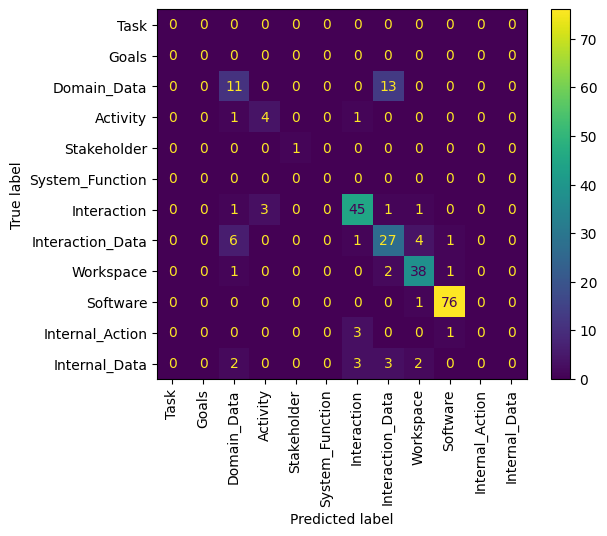

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    solution["label"],
    results["label"],
    labels=TORE_LABELS,
    xticks_rotation="vertical",
)